In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbm 
import random
random.seed(584)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("mnm584cw22023.csv")

## Visualization

<AxesSubplot:>

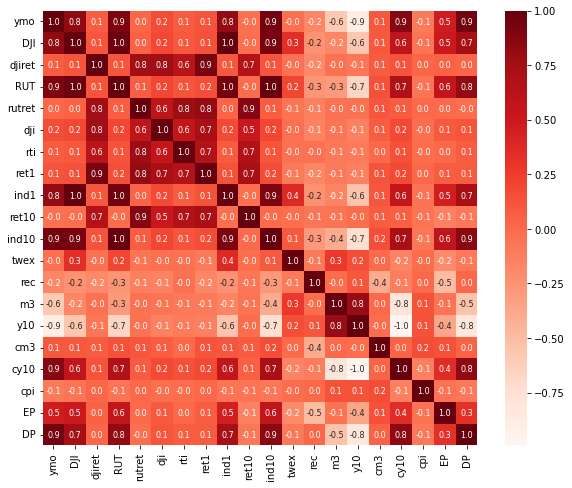

In [3]:
df2 = df.corr(method='pearson')
plot = plt.figure(figsize=(10,8))
sbm.heatmap(df2, 
            xticklabels=df2.columns,
            yticklabels=df2.columns,
            cmap='Reds', cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8})

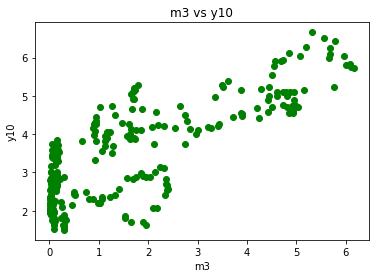

In [13]:
plt.scatter(df['m3'],df['y10'],color='green')
plt.title("m3 vs y10")
plt.xlabel('m3')
plt.ylabel("y10")
plt.show()

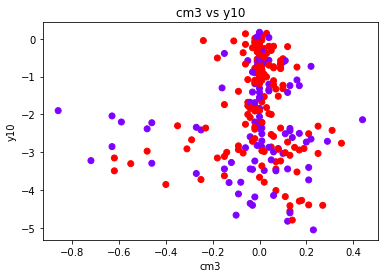

In [15]:
fig, ax = plt.subplots()
plt.title('cm3 vs y10')
plt.xlabel('cm3')
plt.ylabel("y10")
scatter = ax.scatter(df['cm3'],df['cy10'],c=df['dji'], cmap="rainbow")


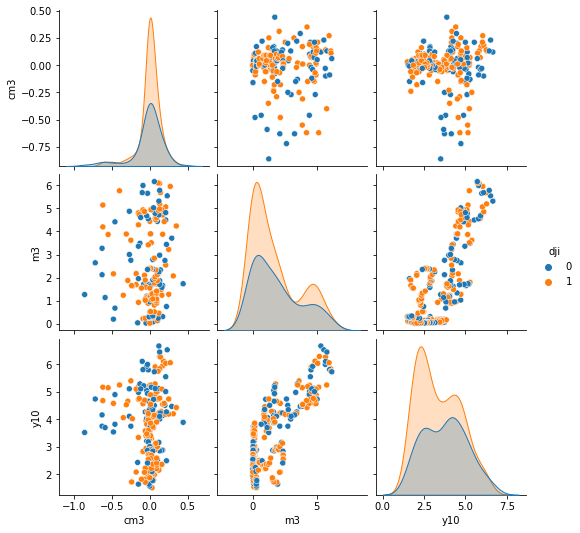

In [10]:
sbm.pairplot(df, vars=["cm3", "m3", "y10"], hue="dji")
plt.show() 

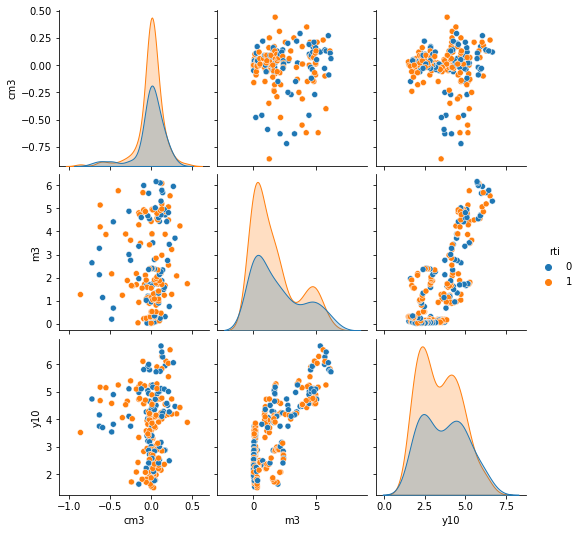

In [11]:
sbm.pairplot(df, vars=["cm3", "m3", "y10"], hue="rti")
plt.show() 

## **Fitting the logit model for DJI**

In [194]:
df['dji1'] = df['dji'].shift(-1)
dfa=df.drop(df.index[253])

In [195]:
LOG_X = dfa[["cm3", "m3", "y10", "cy10", "cpi"]]
LOG_Y = dfa['dji1']
LOG_X = sm.add_constant(LOG_X)

C:\Users\PC\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [196]:
Dji_X_train, Dji_X_test, Dji_Y_train, Dji_Y_test = train_test_split(LOG_X, LOG_Y, test_size=0.3)

In [197]:
LOG5 = sm.Logit(Dji_Y_train,Dji_X_train).fit()
LOG5.summary()

Optimization terminated successfully.
         Current function value: 0.637391
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   dji1   No. Observations:                  177
Model:                          Logit   Df Residuals:                      171
Method:                           MLE   Df Model:                            5
Date:                Thu, 27 Apr 2023   Pseudo R-squ.:                 0.04306
Time:                        14:35:49   Log-Likelihood:                -112.82
converged:                       True   LL-Null:                       -117.90
Covariance Type:            nonrobust   LLR p-value:                   0.07100
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2581      1.655      1.364      0.173      -0.986       5.502
cm3            0.1000      0.886      0.113      0.910      -1.637       1.837
m3             0.3515      0.148      2.371      0.018       0.061       0.642
y10           -0.6631      0.976     -0.680      0.497      -2.576       1.249
cy10          -0.0206      0.967     -0.021      0.983      -1.917       1.876
cpi           -0.3698      0.482     -0.767      0.443      -1.314       0.575
==============================================================================
"""

Our model is very poor at predicting the direction of the stock market in the subsequent month. None of the variables show any significance.

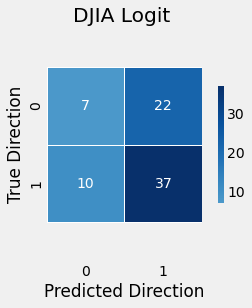

In [198]:
Logit_y_pred = LOG5.predict(Dji_X_test)
Logit_y_pred2 = np.where(Logit_y_pred>0.5,1,0)

from sklearn.metrics import confusion_matrix
DJI_logit = confusion_matrix(Dji_Y_test,Logit_y_pred2)

f, ax = plt.subplots(figsize=(5, 4))
cmap = sbm.diverging_palette(220, 10, as_cmap=True)
sbm.heatmap(DJI_logit, center=0, cmap='Blues',  fmt='g',
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted Direction')
plt.ylabel('True Direction')
plt.title('DJIA Logit ')
plt.show()

We can see that the model is predicting that most of the periods will see a rise in the the Dow Jones Industrial Average index. Of the true rises, the bottom row of the matrix, we see 139 of the 156 correctly predicted. However, when the market actually fell the model only predicts a fall for 25 of the 97 cases. 

The overall prediction accuracy can be calculated simply from python as follows:

In [199]:
DJI_logit1 = (DJI_logit[0,0]+DJI_logit[1,1])/len(Dji_Y_test)
DJI_logit1

0.5789473684210527

## **Fitting the Probit model for DJI**

In [236]:
POG5 = sm.Probit(Dji_Y_train,Dji_X_train).fit()
POG5.summary()

Optimization terminated successfully.
         Current function value: 0.636910
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                   dji1   No. Observations:                  177
Model:                         Probit   Df Residuals:                      171
Method:                           MLE   Df Model:                            5
Date:                Thu, 27 Apr 2023   Pseudo R-squ.:                 0.04378
Time:                        14:58:20   Log-Likelihood:                -112.73
converged:                       True   LL-Null:                       -117.90
Covariance Type:            nonrobust   LLR p-value:                   0.06656
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4596      1.016      1.436      0.151      -0.532       3.451
cm3            0.0642      0.548      0.117      0.907      -1.010       1.138
m3             0.2223      0.092      2.424      0.015       0.043       0.402
y10           -0.4465      0.597     -0.749      0.454      -1.616       0.723
cy10          -0.0438      0.587     -0.074      0.941      -1.195       1.108
cpi           -0.2326      0.294     -0.791      0.429      -0.809       0.344
==============================================================================
"""

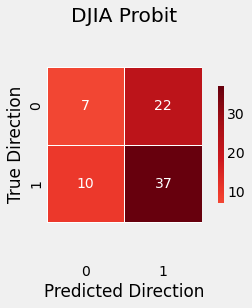

In [237]:
Probit_y_pred = POG5.predict(Dji_X_test)
Probit_y_pred2 = np.where(Probit_y_pred>0.5,1,0)

from sklearn.metrics import confusion_matrix
DJI_Probit = confusion_matrix(Dji_Y_test,Probit_y_pred2)


f, ax = plt.subplots(figsize=(5, 4))
cmap = sbm.diverging_palette(220, 10, as_cmap=True)
sbm.heatmap(DJI_Probit, center=0, cmap='Reds',  fmt='g',
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted Direction')
plt.ylabel('True Direction')
plt.title('DJIA Probit')
plt.show()

In [238]:
DJI_Probit1 = (DJI_Probit[0,0]+DJI_Probit[1,1])/len(Dji_Y_test)
DJI_Probit1

0.5789473684210527

## Stepwise Selection for Logit performing a backward stepwise selection process for DJI

In [203]:
#The first variable to be excluded is cm3
X_train01 = Dji_X_train[["cm3", "m3", "y10", "cy10", "cpi"]]
X_test01 = Dji_X_test[["cm3", "m3", "y10", "cy10", "cpi"]]
lmod01 = sm.Logit(Dji_Y_train,X_train01).fit()

y_pred01 = lmod01.predict(X_test01)
y_pred011 = np.where(y_pred01>0.5,1,0)

logcm01 = confusion_matrix(Dji_Y_test,y_pred011)

logcm01a = (logcm01[0,0]+logcm01[1,1])/len(Dji_Y_test)
logcm01a

Optimization terminated successfully.
         Current function value: 0.642737
         Iterations 5


0.618421052631579

In [204]:
#The first variable to be excluded is m3
X_train02 = Dji_X_train[["m3", "y10", "cy10", "cpi"]]
X_test02 = Dji_X_test[["m3", "y10", "cy10", "cpi"]]
lmod02 = sm.Logit(Dji_Y_train,X_train02).fit()

y_pred02 = lmod02.predict(X_test02)
y_pred02 = np.where(y_pred02>0.5,1,0)

logcm02 = confusion_matrix(Dji_Y_test,y_pred02)

logcm02a = (logcm02[0,0]+logcm02[1,1])/len(Dji_Y_test)
logcm02a

Optimization terminated successfully.
         Current function value: 0.642759
         Iterations 5


0.5921052631578947

Without ret10 the prediction accuracy has risen to 54.90%. Removing ret10 at this stage is a good idea.

In [205]:
#The first variable to be excluded is y10
X_train03 = Dji_X_train[["cm3", "m3", "cy10", "cpi"]]
X_test03 = Dji_X_test[["cm3", "m3", "cy10", "cpi"]]
lmod03 = sm.Logit(Dji_Y_train,X_train03).fit()

y_pred03 = lmod03.predict(X_test03)
y_pred03 = np.where(y_pred03>0.5,1,0)

logcm03 = confusion_matrix(Dji_Y_test,y_pred03)

logcm03a = (logcm03[0,0]+logcm03[1,1])/len(Dji_Y_test)
logcm03a

Optimization terminated successfully.
         Current function value: 0.680267
         Iterations 4


0.42105263157894735

Without twex the prediction accuracy has fallen to 52.94%. Removing ret10 at this stage is not a good idea.

In [206]:
#The first variable to be excluded is "cy10"
X_train04 = Dji_X_train[["cm3", "m3", "y10", "cpi"]]
X_test04 = Dji_X_test[["cm3", "m3", "y10", "cpi"]]
lmod04 = sm.Logit(Dji_Y_train,X_train04).fit()

y_pred04 = lmod04.predict(X_test04)
y_pred04 = np.where(y_pred04>0.5,1,0)

logcm04 = confusion_matrix(Dji_Y_test,y_pred04)

logcm04a = (logcm04[0,0]+logcm04[1,1])/len(Dji_Y_test)
logcm04a

Optimization terminated successfully.
         Current function value: 0.678703
         Iterations 4


0.618421052631579

In [207]:
#The first variable to be excluded is "cpi"
X_train05 = Dji_X_train[["cm3", "m3", "y10", "cy10"]]
X_test05 = Dji_X_test[["cm3", "m3", "y10", "cy10"]]
lmod05 = sm.Logit(Dji_Y_train,X_train05).fit()

y_pred05 = lmod05.predict(X_test05)
y_pred05 = np.where(y_pred05>0.5,1,0)

logcm05 = confusion_matrix(Dji_Y_test,y_pred05)

logcm05a = (logcm05[0,0]+logcm05[1,1])/len(Dji_Y_test)
logcm05a

Optimization terminated successfully.
         Current function value: 0.645017
         Iterations 5


0.618421052631579

## Fitting the Logit model for RUT

In [208]:
df['rti1'] = df['rti'].shift(-1)
dfa=df.drop(df.index[253])

In [209]:
RUT_X = dfa[["cm3", "m3", "y10", "cy10", "cpi"]]
RUT_Y = dfa['rti1']
RUT_X = sm.add_constant(RUT_X)

C:\Users\PC\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [210]:
RUT_x_Train, RUT_x_Test, RUT_y_Train, RUT_y_Test = train_test_split(RUT_X, RUT_Y, test_size=0.3)

In [211]:
RUT_Logit = sm.Logit(RUT_y_Train,RUT_x_Train).fit()
RUT_Logit.summary()

Optimization terminated successfully.
         Current function value: 0.647010
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   rti1   No. Observations:                  177
Model:                          Logit   Df Residuals:                      171
Method:                           MLE   Df Model:                            5
Date:                Thu, 27 Apr 2023   Pseudo R-squ.:                 0.03240
Time:                        14:35:57   Log-Likelihood:                -114.52
converged:                       True   LL-Null:                       -118.35
Covariance Type:            nonrobust   LLR p-value:                    0.1755
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9585      1.647     -1.189      0.234      -5.187       1.270
cm3           -1.0873      0.948     -1.147      0.251      -2.945       0.770
m3             0.0750      0.145      0.516      0.606      -0.210       0.360
y10            1.6685      0.970      1.720      0.085      -0.232       3.569
cy10           1.9452      0.961      2.025      0.043       0.063       3.828
cpi            0.2922      0.417      0.701      0.483      -0.524       1.109
==============================================================================
"""

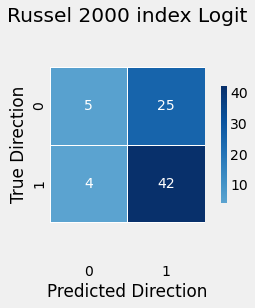

In [212]:
RUT_y_pred = RUT_Logit.predict(RUT_x_Test)
RUT_y_pred2 = np.where(RUT_y_pred>0.5,1,0)

from sklearn.metrics import confusion_matrix
RUT_logit = confusion_matrix(RUT_y_Test,RUT_y_pred2)

f, ax = plt.subplots(figsize=(5, 4))
cmap = sbm.diverging_palette(220, 10, as_cmap=True)
sbm.heatmap(RUT_logit, center=0, cmap='Blues',  fmt='g',
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted Direction')
plt.ylabel('True Direction')
plt.title('Russel 2000 index Logit')
plt.show()

In [213]:
RUT_logit1 = (RUT_logit[0,0]+RUT_logit[1,1])/len(RUT_y_Test)
RUT_logit1

0.618421052631579

## Probit Model for Russel 2000 index

In [247]:
RUT_Probit = sm.Probit(RUT_y_Train,RUT_x_Train).fit()
RUT_Probit.summary()

Optimization terminated successfully.
         Current function value: 0.646997
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                   rti1   No. Observations:                  177
Model:                         Probit   Df Residuals:                      171
Method:                           MLE   Df Model:                            5
Date:                Thu, 27 Apr 2023   Pseudo R-squ.:                 0.03242
Time:                        15:02:28   Log-Likelihood:                -114.52
converged:                       True   LL-Null:                       -118.35
Covariance Type:            nonrobust   LLR p-value:                    0.1752
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1961      1.011     -1.184      0.237      -3.177       0.785
cm3           -0.6772      0.581     -1.166      0.243      -1.815       0.461
m3             0.0464      0.090      0.516      0.606      -0.130       0.223
y10            1.0239      0.593      1.727      0.084      -0.138       2.186
cy10           1.1961      0.587      2.038      0.042       0.046       2.347
cpi            0.1793      0.255      0.703      0.482      -0.320       0.679
==============================================================================
"""

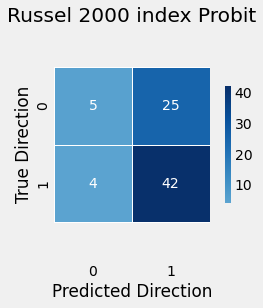

In [248]:
RUT_y_pred1 = RUT_Probit.predict(RUT_x_Test)
RUT_y_pred12 = np.where(RUT_y_pred>0.5,1,0)

from sklearn.metrics import confusion_matrix
RUT_Probit = confusion_matrix(RUT_y_Test,RUT_y_pred12)

f, ax = plt.subplots(figsize=(5, 4))
cmap = sbm.diverging_palette(220, 10, as_cmap=True)
sbm.heatmap(RUT_Probit, center=0, cmap='Blues',  fmt='g',
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted Direction')
plt.ylabel('True Direction')
plt.title('Russel 2000 index Probit')
plt.show()

### PERFORMING A BACKWARD STEPWISE SELECTION FOR RUT

In [216]:
#The first variable to be excluded is cm3
X_train0001 = RUT_x_Train[["m3", "y10", "cy10", "cpi"]]
X_test0001 = RUT_x_Test[["m3", "y10", "cy10", "cpi"]]
lmod0001 = sm.Logit(RUT_y_Train,X_train0001).fit()

y_pred0001 = lmod0001.predict(X_test0001)
y_pred0001 = np.where(y_pred0001>0.5,1,0)

logcm0001 = confusion_matrix(RUT_y_Test,y_pred0001)

logcm0001a = (logcm0001[0,0]+logcm0001[1,1])/len(RUT_y_Test)
logcm0001a

Optimization terminated successfully.
         Current function value: 0.653945
         Iterations 5


0.6447368421052632

In [217]:
#The first variable to be excluded is m3
X_train0003 = RUT_x_Train[["cm3", "y10", "cy10", "cpi"]]
X_test0003 = RUT_x_Test[["cm3", "y10", "cy10", "cpi"]]
lmod0003 = sm.Logit(RUT_y_Train,X_train0003).fit()

y_pred0003 = lmod0003.predict(X_test0003)
y_pred0003 = np.where(y_pred0003>0.5,1,0)

logcm0003 = confusion_matrix(RUT_y_Test,y_pred0003)

logcm0003a = (logcm0003[0,0]+logcm0003[1,1])/len(RUT_y_Test)
logcm0003a

Optimization terminated successfully.
         Current function value: 0.652608
         Iterations 5


0.6447368421052632

In [218]:
#The first variable to be excluded is y10
X_train0004 = RUT_x_Train[["cm3", "m3", "cy10", "cpi"]]
X_test0004 = RUT_x_Test[["cm3", "m3", "cy10", "cpi"]]
lmod0004 = sm.Logit(RUT_y_Train,X_train0004).fit()

y_pred0004 = lmod0004.predict(X_test0004)
y_pred0004 = np.where(y_pred0004>0.5,1,0)

logcm0004 = confusion_matrix(RUT_y_Test,y_pred0004)

logcm0004a = (logcm0004[0,0]+logcm0004[1,1])/len(RUT_y_Test)
logcm0004a

Optimization terminated successfully.
         Current function value: 0.678937
         Iterations 5


0.5394736842105263

In [219]:
#The first variable to be excluded is cy10
X_train0005 = RUT_x_Train[["cm3", "m3", "y10", "cpi"]]
X_test0005 = RUT_x_Test[["cm3", "m3", "y10", "cpi"]]
lmod0005 = sm.Logit(RUT_y_Train,X_train0005).fit()

y_pred0005 = lmod0005.predict(X_test0005)
y_pred0005 = np.where(y_pred0005>0.5,1,0)

logcm0005 = confusion_matrix(RUT_y_Test,y_pred0005)

logcm0005a = (logcm0005[0,0]+logcm0005[1,1])/len(RUT_y_Test)
logcm0005a

Optimization terminated successfully.
         Current function value: 0.670533
         Iterations 5


0.631578947368421

In [220]:
#The first variable to be excluded is cpi
X_train0006 = RUT_x_Train[["cm3", "m3", "y10", "cy10"]]
X_test0006 = RUT_x_Test[["cm3", "m3", "y10", "cy10"]]
lmod0006 = sm.Logit(RUT_y_Train,X_train0006).fit()

y_pred0006 = lmod0006.predict(X_test0006)
y_pred0006 = np.where(y_pred0006>0.5,1,0)

logcm0006 = confusion_matrix(RUT_y_Test,y_pred0006)

logcm0006a = (logcm0006[0,0]+logcm0006[1,1])/len(RUT_y_Test)
logcm0006a

Optimization terminated successfully.
         Current function value: 0.652381
         Iterations 5


0.6842105263157895

## Random Forest Classifier Dow Jones Industrial Average indexs

In [221]:
dji_X = dfa[["cm3", "m3", "y10", "cy10", "cpi"]]
dji_Y = dfa['dji1']
rti_X = dfa[["cm3", "m3", "y10", "cy10", "cpi"]]
rti_Y = dfa['rti1']

In [222]:
dji_features = dji_X
dji_labels = dji_Y
dji_feature_list = list(dji_features.columns)
dji_features = np.array(dji_features)


rti_features = rti_X
rti_labels = rti_Y
rti_feature_list = list(rti_features.columns)
rti_features = np.array(rti_features)

In [223]:
dji_features_train, dji_features_test, dji_labels_train, dji_labels_test = train_test_split(dji_features, dji_labels, test_size=0.3, random_state= 584)
rti_features_train, rti_features_test, rti_labels_train, rti_labels_test = train_test_split(rti_features, rti_labels, test_size=0.3, random_state= 584)

In [224]:
rf_dji = RandomForestClassifier(n_estimators=1000,  max_depth=2 )
rf_dji.fit(dji_features_train, dji_labels_train)
y_dji_pred_rf = rf_dji.predict(dji_features_test)


rf_rti = RandomForestClassifier(n_estimators=1000,  max_depth=2)
rf_rti.fit(rti_features_train, rti_labels_train)
y_rti_pred_rf = rf_rti.predict(rti_features_test)

## Random Forest for Russel 2000 index 

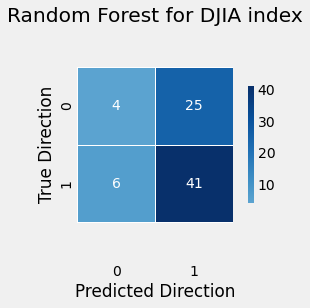

In [225]:
RF_DJI = confusion_matrix(dji_labels_test,y_dji_pred_rf)

f, ax = plt.subplots(figsize=(5, 4))
cmap = sbm.diverging_palette(220, 10, as_cmap=True)
sbm.heatmap(RF_DJI, center=0, cmap='Blues',  fmt='g',
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted Direction')
plt.ylabel('True Direction')
plt.title('Random Forest for DJIA index')
plt.show()

In [226]:
print("Random Forest Classifier:")
print("DJI Accuracy:", accuracy_score(dji_labels_test, y_dji_pred_rf))
print("DJI Precision:", precision_score(dji_labels_test, y_dji_pred_rf, average='macro'))
print("DJI Recall:", recall_score(dji_labels_test, y_dji_pred_rf, average='macro'))
print("DJI F1-score:", f1_score(dji_labels_test, y_dji_pred_rf, average='macro'))

print(" ")

print("RUT Accuracy:", accuracy_score(rti_labels_test, y_rti_pred_rf))
print("RUT Precision:", precision_score(rti_labels_test, y_rti_pred_rf, average='macro'))
print("RUT Recall:", recall_score(rti_labels_test, y_rti_pred_rf, average='macro'))
print("RUT F1-score:", f1_score(rti_labels_test, y_rti_pred_rf, average='macro'))

Random Forest Classifier:
DJI Accuracy: 0.5921052631578947
DJI Precision: 0.5106060606060606
DJI Recall: 0.5051357300073368
DJI F1-score: 0.46539596097118224
 
RUT Accuracy: 0.6052631578947368
RUT Precision: 0.5535714285714286
RUT Recall: 0.5606060606060606
RUT F1-score: 0.5529411764705883


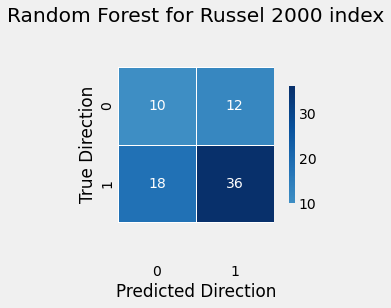

In [227]:
RF_RUT = confusion_matrix(rti_labels_test,y_rti_pred_rf)

f, ax = plt.subplots(figsize=(5, 4))
cmap = sbm.diverging_palette(220, 10, as_cmap=True)
sbm.heatmap(RF_RUT, center=0, cmap='Blues',  fmt='g',
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted Direction')
plt.ylabel('True Direction')
plt.title('Random Forest for Russel 2000 index')
plt.show()

In [228]:
rf_dji.feature_importances_

array([0.13427298, 0.13152007, 0.1866473 , 0.23277333, 0.31478633])

In [229]:
importances = list(rf_rti.feature_importances_)
feature_importances = [(feature, round(importance,2)) for feature, importance in zip(dji_feature_list, importances)]
feature_importances = sorted(feature_importances, key=lambda x:x[1], reverse = True)
[print ('Variable: {:20} Importance: {}' .format(*pair)) for pair in feature_importances]

Variable: cpi                  Importance: 0.3
Variable: y10                  Importance: 0.2
Variable: cy10                 Importance: 0.2
Variable: cm3                  Importance: 0.16
Variable: m3                   Importance: 0.15


[None, None, None, None, None]

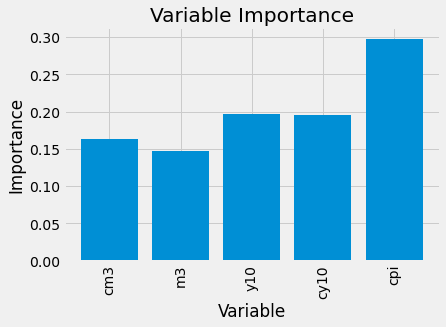

In [230]:
plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation='vertical')
plt.xticks(x_values,dji_feature_list,rotation='vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importance')
plt.show()

### SUPPORT VECTOR MACHINE

In [231]:
from sklearn.svm import SVC

In [232]:
# Perform scaling on the features
scaler = StandardScaler()
dji_X_train = scaler.fit_transform(dji_features_train)
dji_X_test = scaler.fit_transform(dji_features_test)

rti_X_train = scaler.fit_transform(rti_features_train)
rti_X_test = scaler.fit_transform(rti_features_test)

In [190]:

# Train Support Vector Machine Classifier
svm_dji = SVC(random_state=42, probability=True)
svm_dji.fit(dji_X_train, dji_labels_train)

svm_rut = SVC(random_state=42, probability=True)
svm_rut.fit(rti_X_train, rti_labels_train)

SVC(probability=True, random_state=42)

In [191]:
y_dji_pred_svm = svm_dji.predict(dji_X_test)
y_rut_pred_svm = svm_rut.predict(rti_X_test)

In [249]:
print("Support Vector Machine Classifier:")
print("DJI Accuracy:", accuracy_score(dji_labels_test, y_dji_pred_svm))
print("DJI Precision:", precision_score(dji_labels_test, y_dji_pred_svm, average='macro'))
print("DJI Recall:", recall_score(dji_labels_test, y_dji_pred_svm, average='macro'))
print("DJI F1-score:", f1_score(dji_labels_test, y_dji_pred_svm, average='macro'))


print("")
print("RUT Accuracy:", accuracy_score(rti_labels_test, y_rut_pred_svm))
print("RUT Precision:", precision_score(rti_labels_test, y_dji_pred_svm, average='macro'))
print("RUT Recall:", recall_score(rti_labels_test, y_dji_pred_svm, average='macro'))
print("RUT F1-score:", f1_score(rti_labels_test, y_dji_pred_svm, average='macro'))

Support Vector Machine Classifier:
DJI Accuracy: 0.618421052631579
DJI Precision: 0.5608108108108107
DJI Recall: 0.5066030814380044
DJI F1-score: 0.4124233537723274

RUT Accuracy: 0.6842105263157895
RUT Precision: 0.6081081081081081
RUT Recall: 0.5134680134680135
RUT F1-score: 0.45572916666666674


In [250]:
dji_cmsv =confusion_matrix(dji_labels_test,  y_dji_pred_svm)
rti_cmsv=confusion_matrix(rti_labels_test,  y_rut_pred_svm)

print(dji_cmsv)
print(rti_cmsv)

[[ 1 28]
 [ 1 46]]
[[ 5 17]
 [ 7 47]]


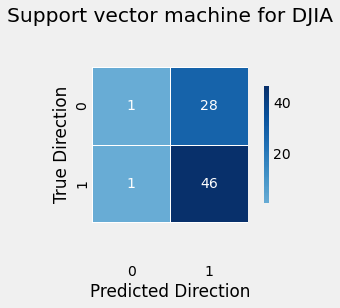

In [251]:
dji_cmsv =confusion_matrix(dji_labels_test,  y_dji_pred_svm)

f, ax = plt.subplots(figsize=(5, 4))
cmap = sbm.diverging_palette(220, 10, as_cmap=True)
sbm.heatmap(dji_cmsv, center=0, cmap='Blues',  fmt='g',
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted Direction')
plt.ylabel('True Direction')
plt.title('Support vector machine for DJIA')
plt.show()

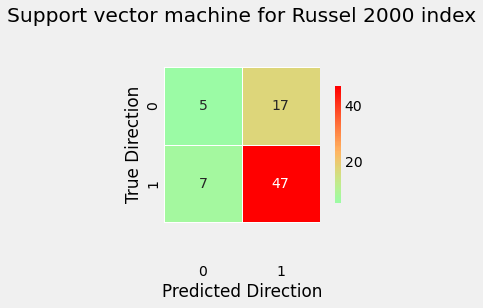

In [254]:
rti_cmsv=confusion_matrix(rti_labels_test,  y_rut_pred_svm)

f, ax = plt.subplots(figsize=(5, 4))
cmap = sbm.diverging_palette(220, 10, as_cmap=True)
sbm.heatmap(rti_cmsv, center=0, cmap='rainbow',  fmt='g',
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted Direction')
plt.ylabel('True Direction')
plt.title('Support vector machine for Russel 2000 index')
plt.show()